In [78]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [79]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [80]:
# Save the input and target variables

print(diabetes_dataset.keys())

data = diabetes_dataset['data']
targets = diabetes_dataset['target']



dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [81]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [82]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [83]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape = (train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [84]:
# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_85 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_86 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_87 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_88 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_89 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_90 (Dense)             (None, 1)               

In [85]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [86]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64, verbose=2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9859 - mae: 0.8567 - val_loss: 0.9714 - val_mae: 0.8237
Epoch 2/100
337/337 - 0s - loss: 0.8922 - mae: 0.8161 - val_loss: 0.7823 - val_mae: 0.7462
Epoch 3/100
337/337 - 0s - loss: 0.6640 - mae: 0.7001 - val_loss: 0.5637 - val_mae: 0.6121
Epoch 4/100
337/337 - 0s - loss: 0.5386 - mae: 0.5929 - val_loss: 0.5396 - val_mae: 0.5435
Epoch 5/100
337/337 - 0s - loss: 0.4894 - mae: 0.5632 - val_loss: 0.5021 - val_mae: 0.5778
Epoch 6/100
337/337 - 0s - loss: 0.4766 - mae: 0.5702 - val_loss: 0.5015 - val_mae: 0.5752
Epoch 7/100
337/337 - 0s - loss: 0.4547 - mae: 0.5538 - val_loss: 0.5135 - val_mae: 0.5882
Epoch 8/100
337/337 - 0s - loss: 0.4575 - mae: 0.5507 - val_loss: 0.4988 - val_mae: 0.5543
Epoch 9/100
337/337 - 0s - loss: 0.4380 - mae: 0.5343 - val_loss: 0.5254 - val_mae: 0.5584
Epoch 10/100
337/337 - 0s - loss: 0.4386 - mae: 0.5336 - val_loss: 0.5019 - val_mae: 0.5521
Epoch 11/100
337/337 - 0s - loss: 0.4208 - m

In [87]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 1.2450 - mae: 0.7220


[0.973413332303365, 0.7219867]

#### Plot the learning curves

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

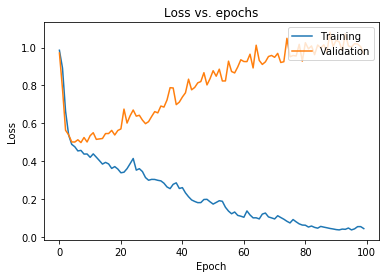

In [89]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [90]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [91]:
def get_regularised_model_ex(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

In [92]:
# Re-build the model with weight decay and dropout layers
### L2 regularization (weight decay) kernal_regularization=tf.keras.regularizers.l2(0.001)
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        BatchNormalization(),  # <- Batch normalisation layer
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        BatchNormalization(),  # <- Batch normalisation layer
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        BatchNormalization(),  # <- Batch normalisation layer
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1, activation='sigmoid')
    ])
    return model

model = get_regularised_model(1e-5, 0.3)

In [93]:
# Add a customised batch normalisation layer

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [94]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [95]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 4s 12ms/sample - loss: 1.6056 - mae: 1.0414 - val_loss: 1.3010 - val_mae: 0.9997
Epoch 2/100
337/337 [==============================] - 0s 804us/sample - loss: 1.2914 - mae: 0.9183 - val_loss: 1.2208 - val_mae: 0.9623
Epoch 3/100
337/337 [==============================] - 0s 610us/sample - loss: 1.1189 - mae: 0.8461 - val_loss: 1.1571 - val_mae: 0.9310
Epoch 4/100
337/337 [==============================] - 0s 598us/sample - loss: 0.8049 - mae: 0.7222 - val_loss: 1.1132 - val_mae: 0.9051
Epoch 5/100
337/337 [==============================] - 0s 872us/sample - loss: 0.7506 - mae: 0.6882 - val_loss: 1.0854 - val_mae: 0.8890
Epoch 6/100
337/337 [==============================] - 0s 600us/sample - loss: 0.6363 - mae: 0.6315 - val_loss: 1.0589 - val_mae: 0.8712
Epoch 7/100
337/337 [==============================] - 0s 608us/sample - loss: 0.6197 - mae: 0.6228 - val_loss: 1.0418 - val_mae: 0.85

In [96]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.9439 - mae: 0.6332


[0.6858161581887139, 0.63319534]

#### Plot the learning curves

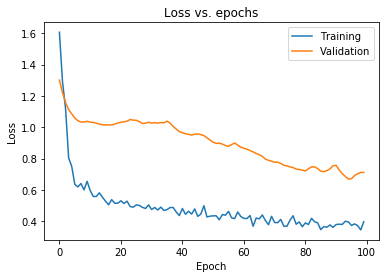

In [97]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [98]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        #Do something at the start of training
        print("Starting training.....")
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
    def on_epoch_end(self, epoch, logs=None):
        #Do something at the end of every epoch
        print(f"Finished epoch {epoch}")
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
    def on_train_end(self, logs=None):
        print("Finished training!")
        
class PredictionCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing.....")
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
    def on_test_end(self, logs=None):
        print("Finished testing!")

class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction.....")
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

        
class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

In [99]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)

In [100]:
# Compile the model
model.compile(loss='mae', optimizer='adam', metrics=['acc','mae'])


#### Train the model with the callback

In [101]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=50, 
                    validation_split=0.15, batch_size=128, 
                    callbacks=[TrainingCallback(), LossAndMetricCallback()], verbose=False)


Starting training.....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0

 After batch 0, the loss is    0.90.
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2

 After batch 2, the loss is    0.92.

 After batch 0, the loss is    1.02.
Finished epoch 0
Epoch 0: Average loss is    0.94, mean absolute error is    0.93.
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0

 After batch 0, the loss is    0.89.
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2

 After batch 2, the loss is    0.91.

 After batch 0, the loss is    1.01.
Finished epoch 1
Epoch 1: Average loss is    0.91, mean absolute error is    0.90.
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0

 After batch 0, the loss is    0.97.
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2

 After 

In [102]:
# Evaluate the model
model.evaluate(test_data, test_targets, callbacks=[TestingCallback(), LossAndMetricCallback()], verbose=2)


Starting testing.....
Testing: Starting batch 0
Testing: Finished batch 0

 After batch 0, the loss is    0.74.
Testing: Starting batch 1
Testing: Finished batch 1

 After batch 1, the loss is    1.05.
45/1 - 0s - loss: 0.9373 - acc: 0.0000e+00 - mae: 0.8229
Finished testing!


[0.829543752140469, 0.0, 0.82286334]

In [103]:
# Make predictions with the model
model.predict(test_data, callbacks=[PredictionCallback(), LossAndMetricCallback()])



Starting prediction.....
Prediction: Starting batch 0
Prediction: Finished batch 0
Finished prediction on batch 0!
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction on batch 1!
Finished prediction!


array([[0.0113906 ],
       [0.00912818],
       [0.01650509],
       [0.00819811],
       [0.00587296],
       [0.00471151],
       [0.00367478],
       [0.00365028],
       [0.01911992],
       [0.0041309 ],
       [0.01162219],
       [0.02447829],
       [0.0103426 ],
       [0.0058817 ],
       [0.00441155],
       [0.00279188],
       [0.00315201],
       [0.00450984],
       [0.00679821],
       [0.00352558],
       [0.00555035],
       [0.00414553],
       [0.00294867],
       [0.00394085],
       [0.00521755],
       [0.00743869],
       [0.00321859],
       [0.01035774],
       [0.00473192],
       [0.00333643],
       [0.00795138],
       [0.0093829 ],
       [0.00316098],
       [0.00856864],
       [0.00551552],
       [0.00300348],
       [0.00365645],
       [0.00383908],
       [0.00796032],
       [0.00344408],
       [0.00417692],
       [0.00393422],
       [0.00435591],
       [0.01015401],
       [0.00645265]], dtype=float32)

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [104]:
# Re-train the unregularised model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01, mode='max') 
### val_loss, val_accuracy, etc (one of key in model.fit): performance measure to decide when to terminate the training.
### if no improvement after 5 epochs, stop.
### min_delta: what qualifies as performance improvement
### mode: maximize monitoring measure (val_accuracy)

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(
    train_data, train_targets, epochs=100, 
    validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)



In [105]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.8525


0.6352396726608276

In [106]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(
    train_data, train_targets, epochs=100, 
    validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [107]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 1.1499


0.9663376225365533

#### Plot the learning curves

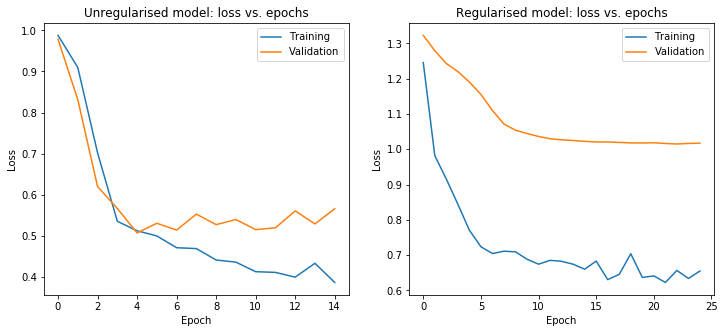

In [108]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()